In [65]:
# Dependencies
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Baldw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#Turn dates to date-time
import csv

with open('titles.csv', newline='',encoding='latin-1') as input_file, open('DatedTitles0.1.csv', mode='w', newline='',encoding='latin-1') as output_file:
    reader = csv.reader(input_file)
    writer = csv.writer(output_file)
    for row in reader:
        # Assuming the third column is zero-indexed
        date_string = row[1]
        formatted_date = f"{date_string[:4]}-{date_string[4:6]}-{date_string[6:]}"
        row[1] = formatted_date

        # Do something with the row here, such as printing it out
        writer.writerow(row)

C:\Users\Baldw\AppData\Local\Temp\ipykernel_16916\2151904569.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_df = df.set_index('date').resample('D').mean().interpolate(method='linear').reset_index()


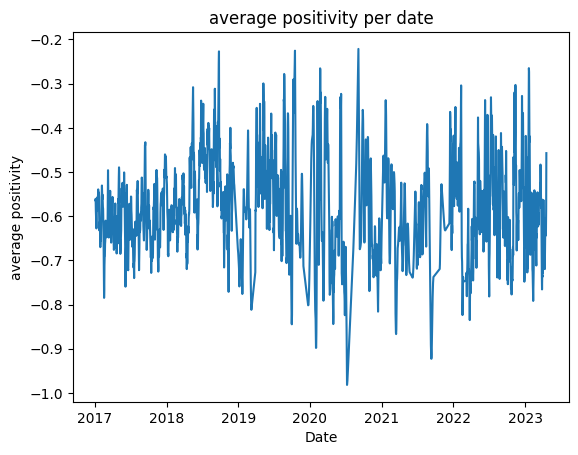

In [17]:
# Histogram to show polarity over time (- and + values)
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('Dated_titles-bert-s.csv', usecols=[0, 1, 5,7], names=['title', 'date', 'rate','label'], header=None, skiprows = 1)

# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df.loc[df['label'] == 0, 'rate'] *= -1

resampled_df = df.set_index('date').resample('D').mean().interpolate(method='linear').reset_index()

# Group the dataframe by date and calculate the average polarity score for each date
grouped_df = df.groupby('date')['rate'].mean()

# Compute a rolling mean using a window of size 7
rolling_mean = resampled_df['rate'].rolling(window=7, center=True).mean()

# Create a line plot with resampled dates on the x-axis and rolling mean on the y-axis
fig, ax = plt.subplots()
ax.plot(resampled_df['date'], rolling_mean)

ax.set_title('average positivity per date')
ax.set_xlabel('Date')
ax.set_ylabel('average positivity')

plt.show()

C:\Users\Baldw\AppData\Local\Temp\ipykernel_25704\4198718437.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_df = df.set_index('date').resample('D').mean().interpolate(method='linear').reset_index()


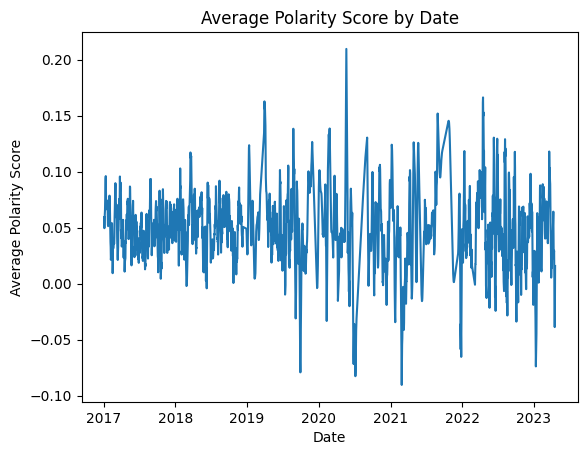

In [25]:
# Histogram to show polarity over time (- and + values)
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('Dated_titles-bert-s--2017-2023-1-per-day.csv', usecols=[0, 1, 3], names=['title', 'date', 'Polarity'], header=None, skiprows = 1)

# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


resampled_df = df.set_index('date').resample('D').mean().interpolate(method='linear').reset_index()

# Group the dataframe by date and calculate the average polarity score for each date
grouped_df = df.groupby('date')['Polarity'].mean()

# Compute a rolling mean using a window of size 7
rolling_mean = resampled_df['Polarity'].rolling(window=7, center=True).mean()

# Create a line plot with resampled dates on the x-axis and rolling mean on the y-axis
fig, ax = plt.subplots()
ax.plot(resampled_df['date'], rolling_mean)

ax.set_title('Average Polarity Score by Date')
ax.set_xlabel('Date')
ax.set_ylabel('Average Polarity Score')

plt.show()
# Set the x-axis tick locations to the dates that are divisible by 1000
# tick_dates = df['date'][df['date'].dt.year % 1000 == 0].unique()
# ax.set_xticks(tick_dates)

plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

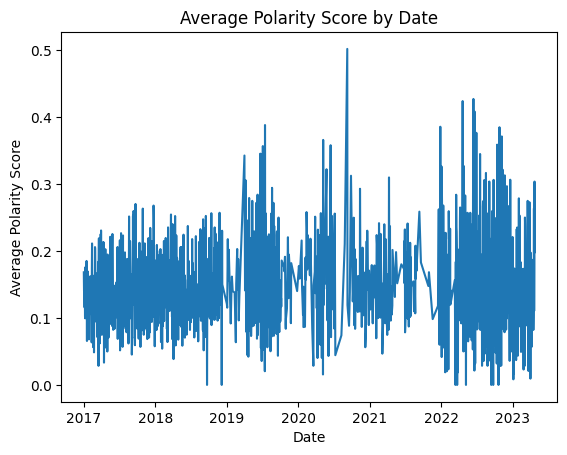

In [31]:
# Histogram to show polarity over time abs value
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('Dated_titles-bert-s--2017-2023-1-per-day.csv', usecols=[0, 1, 3], names=['title', 'date', 'Polarity'], header=None, skiprows = 1)

# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Group the dataframe by date and calculate the average polarit

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

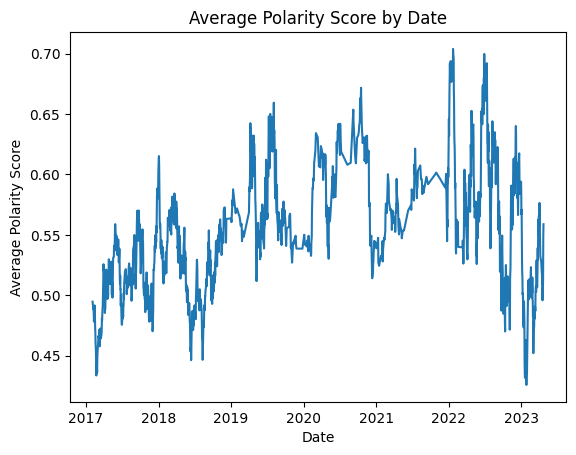

In [32]:
# Histogram to show polarity over time abs value
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('Dated_titles-bert-s-2017-2023-1-per-day.csv', usecols=[0, 1, 3], names=['title', 'date', 'Polarity'], header=None, skiprows = 1)

# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Group the dataframe by date and calculate the average polarity score for each date
mean_abs_polarity = df.groupby('date')['Polarity'].apply(lambda x: x.abs().mean()).rolling(window=30).sum()

# Create a histogram with dates on the x-axis and polarity scores on the y-axis
# Create a line plot with dates on the x-axis and average polarity scores on the y-axis
fig, ax = plt.subplots()
ax.plot(mean_abs_polarity.index, mean_abs_polarity.values / 8)

ax.set_title('Average Polarity Score by Date')
ax.set_xlabel('Date')
ax.set_ylabel('Average Polarity Score')

ax.axvline(x=mean_abs_polarity, color='r', linestyle='--', label='Mean Abs Polarity')



# Set the x-axis tick locations to the dates that are divisible by 1000
# tick_dates = df['date'][df['date'].dt.year % 1000 == 0].unique()
# ax.set_xticks(tick_dates)

plt.show()


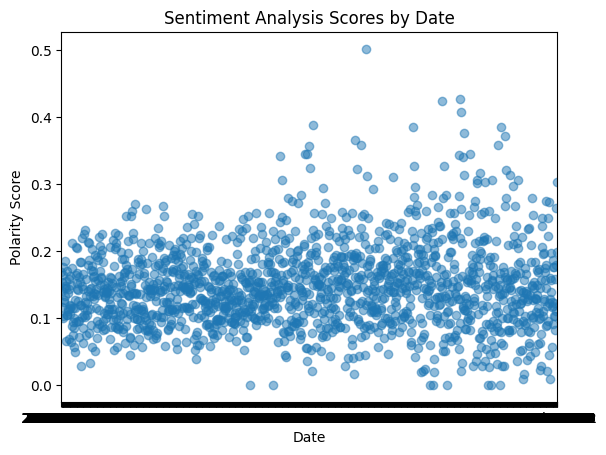

In [2]:
# Display histogram of polarity across the dates of a file
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('Dated_titles-bert-s-2017-2023-1-per-day.csv', usecols=[0, 1, 3], names=['title', 'date', 'Polarity'], header=None)

# Convert the 'date' column to a datetime format
df['Polarity'] = pd.to_numeric(df['Polarity'], errors='coerce')
# Group the dataframe by date and calculate the mean polarity score for each day
daily_scores = df.groupby(['date'])['Polarity'].apply(lambda x: x.abs().mean())


# Create a scatter plot with dates on the x-axis and polarity scores on the y-axis
fig, ax = plt.subplots()
ax.scatter(daily_scores.index, daily_scores.values, alpha=0.5)

ax.set_title('Sentiment Analysis Scores by Date')
ax.set_xlabel('Date')
ax.set_ylabel('Polarity Score')

# Set the x-axis to range from the smallest to the largest datestamp
ax.set_xlim(df['date'].min(), df['date'].max())

plt.show()


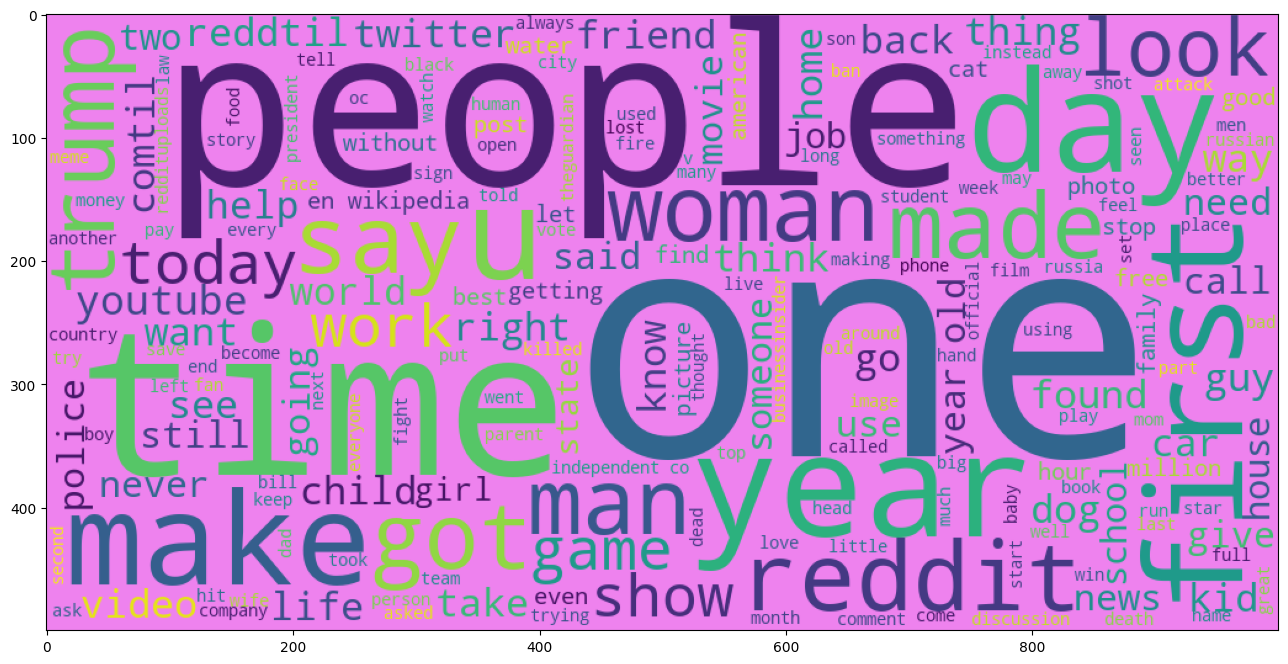

In [69]:
# Lemmetize dataset
# object of WordNetLemmatizer

df = pd.read_csv('Dated_titles-bert-s-2017-2023-1-per-day.csv')

lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    stopwordsFull = set(stopwords.words('english'))
    stopwordsFull.add('imgur')
    stopwordsFull.add('self')
    stopwordsFull.add('v')
    stopwordsFull.add('new')
    stopwordsFull.add('gfycat')
    stopwordsFull.add('u')
    stopwordsFull.add('independent.co')
    stopwordsFull.add('reddtil')
    stopwordsFull.add('say')
    stopwordsFull.add('really')
    stopwordsFull.add('actually')
    stopwordsFull.add('comtil')
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in stopwordsFull]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

corpus = text_transformation(df['title'])

# Now create wordcloud
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='violet',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)



In [42]:
# How to use spacy to extract names and for example find the most popular names
import csv
import spacy
from collections import Counter

nlp = spacy.load('en_core_web_md')

# function to lemmatize named entities in a spaCy document.
def lemmatize_names(doc):
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            # Get the lemmatized form of the named entity
            lemma = ent.root.lemma_
            # Replace all occurrences of the original text with the lemma
            for token in ent:
                if not token.is_punct:
                    token.lemma_ = lemma


with open("SA_Bert-s.csv", 'r', encoding = 'latin-1') as csvfile:
    csvreader = csv.reader(csvfile)
    name_counts = Counter()
    seen_names = set()
    for row in df.itertuples():
        title = row.title
        label = row.label
        if label == 1:
            doc = nlp(title)
            lemmatize_names(doc)
        for ent in doc.ents:
            if ent.label_ == "PERSON":
                name = ent.lemma_
                # check if any part of the name has already been seen
                if not any(part in name for part in seen_names):
                    name_counts[name] += 1
                    seen_names.update(name.split())
                        
for name, count in name_counts.most_common(10):
    print(f"{name}: {count}")


Finegood Finegood: 1
Hollyweed: 1
Mountain Mountain: 1
Gervais Gervais: 1
Seinfeld Seinfeld: 1
C.K C.K: 1
Rock Rock: 1
Wire Wire: 1
Potter Potter: 1
Pepper: 1


In [3]:
# Display the top names in positive posts 
import csv
import spacy
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load('en_core_web_md')

def lemmatize_names(doc):
    """
    Helper function to lemmatize named entities in a spaCy document.
    """
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            # Get the lemmatized form of the named entity
            lemma = ent.root.lemma_
            # Replace all occurrences of the original text with the lemma
            for token in ent:
                if not token.is_punct:
                    token.lemma_ = lemma

# List of names it displays which are not accurate names 
badNames = ["askreddit","showerthought","M M","Guy","guy","Freakout","WCGW","AITA","Thread Thread","Paul Paul","Smith Smith","Kelly Kelly", "Williams Williams","Savage Savage","Stewart Stewart","James James"]
# Open the CSV file
with open('Dated_titles-bert-s-2017-2023-1-per-day.csv', 'r', encoding='latin-1') as csvfile:
    csvreader = csv.DictReader(csvfile)
    name_counts = Counter()
    for row in csvreader:
        # Get the title from the current row
        title = row['title']
        label = row['TLabel']
        # Process the title with spaCy
        doc = nlp(title)
        # Lemmatize the named entities in the document
        lemmatize_names(doc)
        # Count the lemmatized named entities
        # Pass over positive labels 
        if label == 'LABEL_0':
            continue
        for ent in doc.ents:
            if ent.label_ == "PERSON":
                name = ent.lemma_
                if name not in badNames:
                    name_counts[name] += 1

# Get the top 10 most common named entities
top_names = [name for name, count in name_counts.most_common(12)]
counts = [count for name, count in name_counts.most_common(12)]

# Create a pie chart
plt.pie(counts, labels=top_names,autopct='%1.0f')
plt.axis('equal')
plt.title("Top Named Entities in positive Reddit Titles")
plt.show()


c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileNotFoundError: [Errno 2] No such file or directory: 'SA_Bert-s.csv'

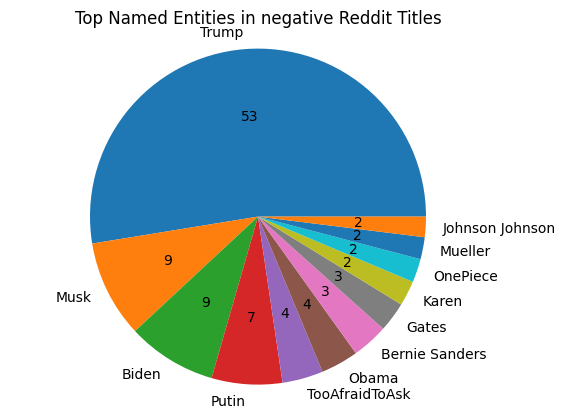

In [22]:
# Display the most popular names in negative 
import csv
import spacy
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load('en_core_web_md')

def lemmatize_names(doc):
    """
    Helper function to lemmatize named entities in a spaCy document.
    """
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            # Get the lemmatized form of the named entity
            lemma = ent.root.lemma_
            # Replace all occurrences of the original text with the lemma
            for token in ent:
                if not token.is_punct:
                    token.lemma_ = lemma

badNames = ["askreddit","showerthought","M M","Guy","guy","Freakout","WCGW","AITA","Thread Thread","Paul Paul","Smith Smith","Kelly Kelly"]
# Open the CSV file
with open("SA_Bert-s.csv", 'r', encoding='latin-1') as csvfile:
    csvreader = csv.DictReader(csvfile)
    name_counts = Counter()
    for row in csvreader:
        # Get the title from the current row
        title = row['title']
        label = row['TLabel']
        # Process the title with spaCy
        doc = nlp(title)
        # Lemmatize the named entities in the document
        lemmatize_names(doc)
        # Count the lemmatized named entities
        # Pass over positive labels 
        if label == 'LABEL_1':
            continue
        for ent in doc.ents:
            if ent.label_ == "PERSON":
                name = ent.lemma_
                if name not in badNames:
                    name_counts[name] += 1

# Get the top 10 most common named entities
top_names = [name for name, count in name_counts.most_common(12)]
counts = [count for name, count in name_counts.most_common(12)]

# Create a pie chart
plt.pie(counts, labels=top_names,autopct='%1.0f')
plt.axis('equal')
plt.title("Top Named Entities in negative Reddit Titles")
plt.show()


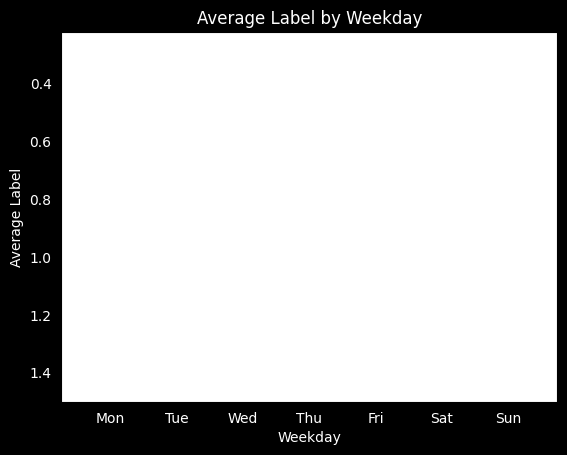

In [18]:
# Show average positivity per day 
import pandas as pd
import matplotlib.pyplot as plt

# Read in csv file
df = pd.read_csv('SA_Bert-S-2017-2023-1-per-day.csv')

# Filter rows for each weekday
monday_df = df[df['weekDay'] == 'Monday']
tuesday_df = df[df['weekDay'] == 'Tuesday']
wednesday_df = df[df['weekDay'] == 'Wednesday']
thursday_df = df[df['weekDay'] == 'Thursday']
friday_df = df[df['weekDay'] == 'Friday']
saturday_df = df[df['weekDay'] == 'Saturday']
sunday_df = df[df['weekDay'] == 'Sunday']

# Calculate average label for each weekday
mon_avg = monday_df['label'].mean()
tue_avg = tuesday_df['label'].mean()
wed_avg = wednesday_df['label'].mean()
thu_avg = thursday_df['label'].mean()
fri_avg = friday_df['label'].mean()
sat_avg = saturday_df['label'].mean()
sun_avg = sunday_df['label'].mean()

# Create a bar chart for bars with heights >= 1.5
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
averages = [mon_avg, tue_avg, wed_avg, thu_avg, fri_avg, sat_avg, sun_avg]

# Set background color to black
plt.figure(facecolor='black')

# Set bar colors to purple
bar_colors = ['purple' if avg >= 0.15 else 'grey' for avg in averages]

plt.bar(weekdays, averages, color=bar_colors)
plt.ylim(1.5, None)  # Set y-axis limit to start at 1.5

# Set chart title and labels with white text color
plt.title('Average Label by Weekday', color='white')
plt.xlabel('Weekday', color='white')
plt.ylabel('Average Label', color='white')

# Set tick colors to white
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()


Number of rows containing the search string 'Reddit': 1105


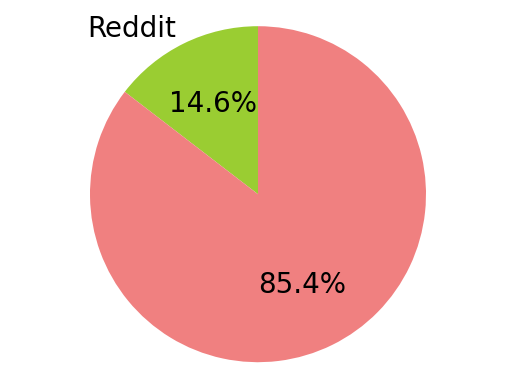

0.1705508474576271

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Dated_titles-bert-s-2017-2023-1-per-day.csv')

def positive_negative_ratio(search_string):
    # Define a function to check if a title contains the search string
    def check_search(title):
        return search_string.lower() in title.lower()

    # Filter the DataFrame to include only rows where the title contains the search string
    df_search = df[df['title'].apply(check_search)]
    print(f"Number of rows containing the search string '{search_string}': {len(df_search)}")

    # Count the number of times "LABEL_1" appears in the TLabel column for these rows
    count_pos = len(df_search[df_search['TLabel'] == 'LABEL_1'])

    # Count the number of rows where the TLabel column is "LABEL_0"
    count_neg = len(df_search[df_search['TLabel'] == 'LABEL_0'])

    # Create a pie chart of the counts
    labels = ["{}".format(search_string), '']
    sizes = [count_pos, count_neg]
    colors = ['yellowgreen', 'lightcoral']
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})
    ax.axis('equal')
    ax.set_facecolor('none')  # set the background color to none
    plt.show()

    if count_neg == 0:
        count_neg = count_neg + 1
    return count_pos/count_neg

positive_negative_ratio('Reddit')


In [1]:
import pandas as pd

# read the CSV file into a pandas DataFrame
df = pd.read_csv('Dated_titles-bert-s-2017-2023-1-per-day.csv')

# create a new column 'label 1' with default value of 0
df['label'] = 0

# iterate through each row of the DataFrame
for index, row in df.iterrows():
    # check if the value in 'TLabel' column is equal to 'LABEL_1'
    if row['TLabel'] == 'LABEL_1':
        # if yes, set the value of 'label 1' column to 1
        df.at[index, 'label'] = 1

# save the updated DataFrame to a new CSV file
df.to_csv('Dated_titles-bert-s.csv', index=False)


Number of rows containing the search string 'Trump': 705


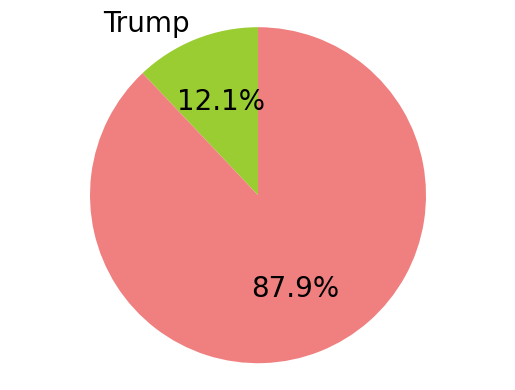

Number of rows containing the search string 'Trump Trump': 0


C:\Users\Baldw\AppData\Roaming\Python\Python310\site-packages\matplotlib\axes\_axes.py:3201: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [19]:
# Find the most postive names, as in the names whose title they appear in has the highest positivity ratio
import csv
import spacy
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load('en_core_web_md')

def lemmatize_names(doc):
    """
    Helper function to lemmatize named entities in a spaCy document.
    """
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            # Get the lemmatized form of the named entity
            lemma = ent.root.lemma_
            # Replace all occurrences of the original text with the lemma
            for token in ent:
                if not token.is_punct:
                    token.lemma_ = lemma

badNames = ["askreddit","LeBronBasketball","farewell","showerthought","M M","Guy","guy","Freakout","WCGW","AITA","Thread Thread","Paul Paul","Smith Smith","Kelly Kelly", "Williams Williams","Savage Savage","Stewart Stewart","James James","AMA!AMA"]
# Open the CSV file
with open("SA_Bert-S-2017-2023-1-per-day.csv", 'r', encoding='latin-1') as csvfile:
    csvreader = csv.DictReader(csvfile)
    name_counts = Counter()
    for row in csvreader:
        # Get the title from the current row
        title = row['title']
        label = row['TLabel']
        # Process the title with spaCy
        doc = nlp(title)
        # Lemmatize the named entities in the document
        lemmatize_names(doc)
        # Count the lemmatized named entities
        # Pass over positive labels 
        if label == 'LABEL_0':
            continue
        for ent in doc.ents:
            if ent.label_ == "PERSON":
                name = ent.lemma_
                if name not in badNames:
                    name_counts[name] += 1

# Get the top 10 most common named entities
top_names = [name for name, count in name_counts.most_common(100)]
counts = [count for name, count in name_counts.most_common(100)]

top_names_rate = []
for name in top_names:
    if name not in badNames:  
        top_names_rate.append(positive_negative_ratio(name))

top_names_rate = zip(top_names_rate,top_names)

sorted_list = sorted(top_names_rate, key=lambda x: x[0], reverse=True)
top_10 = sorted_list[:6]

# Create a list of x-axis labels (i.e. the second element of each tuple)
x_labels = [item[1] for item in top_10]

# Create a list of y-axis values (i.e. the first element of each tuple)
y_values = [item[0] for item in top_10]

# Create a bar chart with black background and purple bars
fig, ax = plt.subplots()
ax.bar(x_labels, y_values, color='purple')

# Set the chart title and axis labels, and change the font color to white
ax.set_title('Most positive names', color='white')
ax.set_xlabel('Names', color='white')
ax.set_ylabel('Positive title ratio', color='white')

# Set the background color to black
fig.set_facecolor('black')
ax.set_facecolor('black')

# Set the tick labels color to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Show the chart
plt.show()





Number of rows containing the search string 'Trump': 705
Number of rows containing the search string 'Biden': 117
Number of rows containing the search string 'Musk': 98
Number of rows containing the search string 'Harry Potter': 21
Number of rows containing the search string 'Grandma': 50
Number of rows containing the search string 'Ben': 132
Number of rows containing the search string 'Howard Howard': 0
Number of rows containing the search string 'Putin': 76
Number of rows containing the search string 'Scott Scott': 0
Number of rows containing the search string 'Brown Brown': 0
Number of rows containing the search string 'Hamill Hamill': 0
Number of rows containing the search string 'Obama Obama': 0
Number of rows containing the search string 'Obama': 71
Number of rows containing the search string 'Ramsay Ramsay': 0
Number of rows containing the search string 'Reynolds Reynolds': 0
Number of rows containing the search string 'Cap': 316
Number of rows containing the search string 'Toro

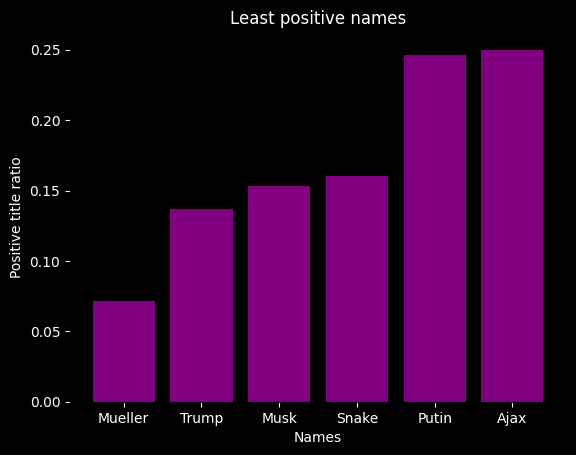

In [18]:
# Find the least postive names, as in the names whose title they appear in has the highest positivity ratio
import csv
import spacy
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load('en_core_web_md')

def lemmatize_names(doc):
    """
    Helper function to lemmatize named entities in a spaCy document.
    """
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            # Get the lemmatized form of the named entity
            lemma = ent.root.lemma_
            # Replace all occurrences of the original text with the lemma
            for token in ent:
                if not token.is_punct:
                    token.lemma_ = lemma

badNames = ["askreddit","Trumps","LeBronBasketball","farewell","showerthought","M M","Guy","guy","Freakout","WCGW","AITA","Thread Thread","Paul Paul","Smith Smith","Kelly Kelly", "Williams Williams","Savage Savage","Stewart Stewart","James James","AMA!AMA"]
# Open the CSV file
with open("SA_Bert-s.csv", 'r', encoding='latin-1') as csvfile:
    csvreader = csv.DictReader(csvfile)
    name_counts = Counter()
    for row in csvreader:
        # Get the title from the current row
        title = row['title']
        label = row['TLabel']
        # Process the title with spaCy
        doc = nlp(title)
        # Lemmatize the named entities in the document
        lemmatize_names(doc)
        # Count the lemmatized named entities
        # Pass over positive labels 
        if label == 'LABEL_0':
            continue
        for ent in doc.ents:
            if ent.label_ == "PERSON":
                name = ent.lemma_
            if name not in badNames:
                name_counts[name] += 1

# Get the top 10 most common named entities
top_names = [name for name, count in name_counts.most_common(100)]
counts = [count for name, count in name_counts.most_common(100)]

top_names_rate = []
for name in top_names:
    if name not in badNames:  
        top_names_rate.append(positive_negative_ratio(name))

top_names_rate = zip(top_names_rate,top_names)

sorted_list = sorted(top_names_rate, key=lambda x: x[0], reverse=False)
filtered_list = [t for t in sorted_list if t[0] != 0]

top_10 = filtered_list[:6]

# Create a list of x-axis labels (i.e. the second element of each tuple)
x_labels = [item[1] for item in top_10]

# Create a list of y-axis values (i.e. the first element of each tuple)
y_values = [item[0] for item in top_10]

# Create a bar chart with black background and purple bars
fig, ax = plt.subplots()
ax.bar(x_labels, y_values, color='purple')

# Set the chart title and axis labels, and change the font color to white
ax.set_title('Least positive names', color='white')
ax.set_xlabel('Names', color='white')
ax.set_ylabel('Positive title ratio', color='white')

# Set the background color to black
fig.set_facecolor('black')
ax.set_facecolor('black')

# Set the tick labels color to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Show the chart
plt.show()





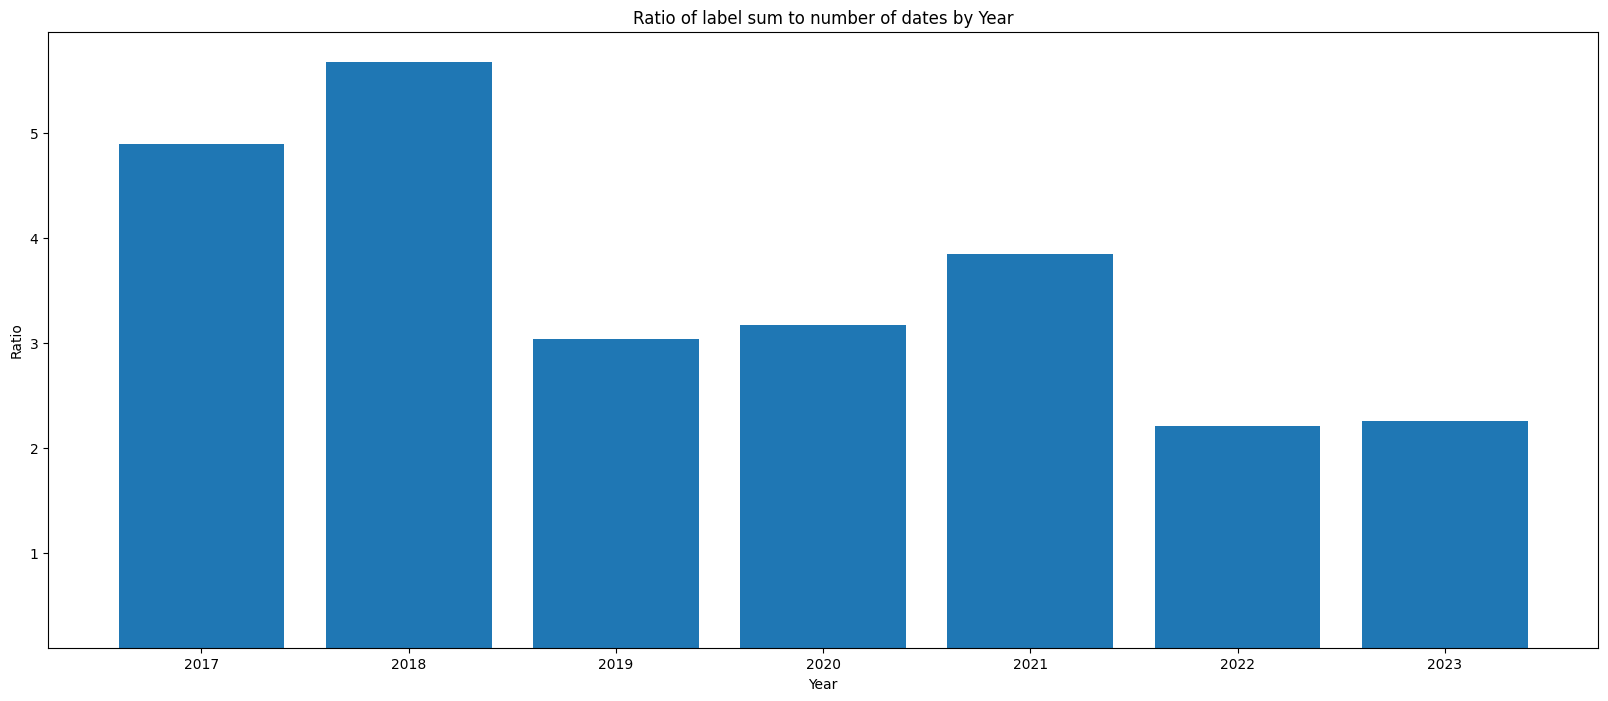

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('Dated_titles-bert-s.csv', usecols=[0, 1, 2, 3, 4, 5, 6, 7], names=['col1', 'date', 'col3', 'col4', 'col5', 'col6', 'col7', 'label'], header=None, skiprows=1)

# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Group the dataframe by year and calculate the sum of the 'label' column for each year
label_sum = df.groupby(df['date'].dt.year)['label'].sum()

# Calculate the number of dates in each year
date_count = df.groupby(df['date'].dt.year)['date'].nunique()

# Calculate the ratio of label sum to number of dates for each year
ratio = label_sum / date_count

# Create a bar chart with years on the x-axis and ratio on the y-axis
fig, ax = plt.subplots()
ax.bar(ratio.index, ratio.values)

ax.set_title('Ratio of label sum to number of dates by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Ratio')

# Set the lower limit of the y-axis to 0.1
ax.set_ylim(bottom=0.1)

plt.show()


In [4]:
# Search for the titles that are negative and positive for a given entity. 
import csv
import spacy

nlp = spacy.load('en_core_web_md')

def lemmatize_names(doc):
    """
    Helper function to lemmatize named entities in a spaCy document.
    """
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            # Get the lemmatized form of the named entity
            lemma = ent.root.lemma_
            # Replace all occurrences of the original text with the lemma
            for token in ent:
                if not token.is_punct:
                    token.lemma_ = lemma

def get_titles_containing_name(csv_file_path, model, bad_names, name):
    """
    Returns a list of titles that contain the given name and have a 0 in the label column.
    """
    with open(csv_file_path, 'r', encoding='latin-1') as csvfile:
        csvreader = csv.DictReader(csvfile)
        titlesNeg = []
        titlesPos = []
        for row in csvreader:
            # Check if the title contains the given name and has a 0 in the label column
            if name.lower() in row['title'].lower() and row['label'] == '0':
                # Process the title with spaCy
                doc = model(row['title'])
                # Lemmatize the named entities in the document
                lemmatize_names(doc)
                # Check if any of the named entities match the given name
                for ent in doc.ents:
                    if ent.label_ == "PERSON":
                        if ent.lemma_.lower() == name.lower() and ent.lemma_ not in bad_names:
                            # Add the full text of the title to the list
                            titlesNeg.append(row['title'])
                            break
            if name.lower() in row['title'].lower() and row['label'] == '1':
                # Process the title with spaCy
                doc = model(row['title'])
                # Lemmatize the named entities in the document
                lemmatize_names(doc)
                # Check if any of the named entities match the given name
                for ent in doc.ents:
                    if ent.label_ == "PERSON":
                        if ent.lemma_.lower() == name.lower() and ent.lemma_ not in bad_names:
                            # Add the full text of the title to the list
                            titlesPos.append(row['title'])
                            break
    return titlesNeg, titlesPos

csv_file_path = "SA_Bert-s.csv"
bad_names = ["askreddit","showerthought","M M","Guy","guy","Freakout","WCGW","AITA"]
name = "OnePiece"
titlesNeg1 = get_titles_containing_name(csv_file_path, nlp, bad_names, name)
titlesPos1 = get_titles_containing_name(csv_file_path,nlp,bad_names, name)[1]
print(len(titlesNeg1))
print(titlesNeg1)
print(len(titlesPos1))
print(titlesPos1)



2
(['One Piece: Chapter 972 - Official Release DiscussionDiscussion (self.OnePiece)', 'One Piece chapter 999 spoilersDiscussion  (self.OnePiece)', 'One Piece chapter 1005 spoilersDiscussion  (self.OnePiece)', 'One Piece chapter 1009 spoilersDiscussion  (self.OnePiece)', 'One Piece chapter 1018 spoilersDiscussion  (self.OnePiece)', 'One Piece chapter 1019 spoilersDiscussion  (self.OnePiece)', 'One Piece chapter 1035 spoilersDiscussion  (self.OnePiece)', 'Chapter 1044 Spoilers New ThreadDiscussion  (self.OnePiece)', 'What is one thing you genuinely dislike about one piece?Discussion  (self.OnePiece)', 'One Piece chapter 1052 spoilersDiscussion  (self.OnePiece)', "Suggestion: Let's just not talk about it anymore. (Spoiler for 1052, I guess)Discussion (self.OnePiece)", 'One Piece chapter 1058 spoilersSpoiler thread (self.OnePiece)', 'One Piece chapter 1060 spoilersSpoiler thread (self.OnePiece)', 'One Piece Chapter 1079 SpoilersDiscussion  (self.OnePiece)', 'One Piece Chapter 1080 Spoilers